# Задание 3: Исследование эффективности алгоритмов сортировок для различных структур и размерностей данных
## Метод Шелла с собственным алгоритмом изменения числа серий
Сортировка Шелла (англ. Shell sort) — алгоритм сортировки, являющийся усовершенствованным вариантом сортировки вставками. 

Идея метода Шелла состоит в сравнении элементов, стоящих не только рядом, но и на определённом расстоянии друг от друга. При сортировке Шелла сначала сравниваются и сортируются между собой значения, стоящие один от другого на некотором расстоянии `d`. После этого процедура повторяется для некоторых меньших значений `d`, а завершается сортировка Шелла упорядочиванием элементов при `d=1` (то есть обычной сортировкой вставками). 

Реализуем сортировку Шелла, используя шаги (gaps) сортировки, соответствующие факториалам, меньшим размера массива.

### Импорт необходимых библиотек:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from tqdm import tqdm_notebook
import timeit

### Реализация нахождения множества факториалов, меньших числа
По заданию необходимо реализовать собственный алгоритм изменения числа серий, через которые сортировка Шелла будет проходить по неотсортированному массиву. Эврестически доказано, что наибольшую эффективность показывают шаги, приближенные по соотношению к эспоненциальному росту  значений внутри последовательности, так, например, экспериментально найденная последовательность Марцина Циура $(1, 4, 10, 23, 57, 132, 301, 701, 1750)$ показывает наилучший из известных результатов на множестве элементов, меньшем 4000 по силе. Легко заметить, что приблизительно последовательнсть показывает экспоненциальный рост используемых значений. Поскольку планируется рассматривать массивы чисел, по размеру многократно превышающие 4000, имеет смысл рассматривать такую последовательность,которая сможет соответствующе резко возрастать для увеличивающихся значений массива. 

Таким образом, нам следует найти функцию, которая экспоненциально возрастает на малых размерах, а затем возрастает еще большими темпами. Также эта функция должна быть дискретно-разделимой, то есть можно получить ее целочисленные значения или целочисленное приближение. Помимо того, крайне желательно, чтобы вычисление этой функции не представляло особой математической или вычислительной сложности, поскольку эта последовательность будет расчитываться каждй раз перед сортировкой, а значит вычислительно сложные функции существенно снизят скорость алгоритма, что недопустимо. 

На основании вышеперечисленных условий была предпринята попытка рассматривать последовательность факториалов как множества шагов для сортировки Шелла, поскольку наибольший интерес составляет производительность сортировки на больших размерах массива (к примеру, 5000, 30000, 100000 элементов). Скорость возрастания факториала, превышающая скорость возрастания экспоненты, позволяет сортировке более эффективно отсортировывать массив на чрезвычайно больших объемах данных, поскольку такой подход, фактически, будет делить массив на частично отсортированные куски, в то время как меньшие шаги будут работать локально на таких подмассивах. 

Функция представляет собой последовательное вычисление факториалов, начиная с $1, 2, 6...$ и так далее до некоторого числа $n!$, при этом $n! < k$, где $k$ - мощность сортируемого массива. Максимальный шаг $n!$, меньший $k$, позволяет проходить по массиву величиной $k$ с эффективным делением массива. Помимо этого, были введены дополнительные промежуточные шаги, поскольку прирост факториала настолько велик, что не дает достаточного числа разбиений. Дополнительные шаги определяются как среднее арифметическое ghtlпоследнего шага и нового значения факториала, а также среднее арифметическое последнего шага и значения факториала. В конце разбиения, когда следующий факториал уже больше величины массива, проверяется, возможно ли еще добавить еще один шаг, также среднее арифметическое двух последних факториалов.

Таким образом, интересующие нас последовательности будут следующего вида:
$$a_1 = \{1\}$$
$$a_2 = \{1, 2\}$$
$$a_3 = \{1, 2, 6\}$$
$$a_4 = \{1, 2, 6, 24\}$$
После 4-ой последовательности кроме факториала также будут добавляться 2 элемента:
$$a_n = \{1, 2, 6, …, (n-1)!, \frac{(n-1)!+n!}{2}, \frac{\frac{(n-1)!+n!}{2}+n!}{2}, n!\}$$
В частности:
$$a_5 = \{1, 2, 6, 24, 63, 91, 120\}$$
$$a_6 = \{1, 2, 6, 24, 63, 91, 120, 405, 562, 720\}$$
$$a_7 = \{1, 2, 6, 24, 63, 91, 120, 405, 562, 720, 2801, 3920, 5040\}$$
И так далее.

Прогнозируемая эффективность алгоритма - $O(n^{\frac{3}{2}})$, с ускорением до $O(n)$ в особых случаях, когда перестановки не требуются. В целом, это средняя эффективность для типичных последовательностей шагов в сортировке Шелла. На различных видах данных такое разбиение шагов может быть как более, так и менее эффективным по сравнению с другими способами. Ожидается, что такой вид разбиения будет более эффективен при больших объемах данных (>10000 элементов).

Подобное исследование было проведено с поседовательностью чисел Фибоначчи, но факториальный рост шага показал себя более эффективным на больших объемах данных, в связи с чем было принято использовать именно последовательность факториалов.

В завершение отметим, что функция возвращает последовательность факториалов в _обратном_ порядке. Это было сделано для того, чтобы при возвращении значения функции эта последовательность без последующих преобразований использовалась для итерации. Очевидно, что использование шагов в сортировке должно идти от больших шагов к малым.

In [2]:
def factorial_sequense(cap):
    MOD_ITEM = 4
    value = 1
    i = 1
    seq = []
    while value < cap:
        if len(seq) >= MOD_ITEM:
            seq.append((value + seq[-2]) // 2)
            seq.append((value + seq[-1]) // 2)
        seq.append(value)
        i += 1
        value *= i
    if ((value + seq[-2]) // 2) < cap:
        seq.append((value + seq[-2]) // 2)
    if ((value + seq[-1]) // 2) < cap:
        seq.append((value + seq[-1]) // 2)
    return seq[::-1]

Также для сравнения сравним производительность алгоритма с факториальными шагами и производительность алгоритма с стандартными шагами, описанными Шеллом: $d_1=\frac{N}{2}, d_i=\frac{d_{i-1}}{2}, d_k=1$

In [3]:
def binominal_sequence(cap):
    seq = []
    while cap > 1:
        cap //= 2
        seq.append(cap)
    return seq

### Реализация сортировки с заданным шагом:

In [4]:
def shell_sort(collection, find_gaps):
    gaps = find_gaps(len(collection))

    for gap in gaps:
        i = gap
        while i < len(collection):
            temp = collection[i]
            j = i
            while j >= gap and collection[j - gap] > temp:
                collection[j] = collection[j - gap]
                j -= gap
            collection[j] = temp
            i += 1

    return collection

Для замера производительности будем использовать следующие размеры массивов:

In [5]:
size_values = [500, 1000, 3000, 5000, 8000, 10000, 30000, 60000, 120000, 180000]
print('Будут использованы массивы следующих размеров: ', size_values)

Будут использованы массивы следующих размеров:  [500, 1000, 3000, 5000, 8000, 10000, 30000, 60000, 120000, 180000]


Предварительно сгенерируем массив случайных чисел максимальной из используемых величин, чтобы в дальнейшем использовать его подмассивы для сортировки. В дальнейшем для точности измеряемых показателей мы будем измерять не линейное подмножества массива, а случайно взятые его элементы. Это позволит существенно ускорить процесс измерения производительности алгоритма, поскольку генерировать каждый раз массив случайных чисел для каждой итерации теста будет затратно по времени. Случайная выборка заданного числа элементов из массива реализуется в библиотеке Numpy. 

In [6]:
array = np.random.randint(0, size_values[-1], size_values[-1])
array

array([ 78162,  46170, 112282, ...,  87768,  35367,  82351])

## Обычный случай (случайный массив)

In [7]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a, factorial_sequense)", 
                   repeat=5, 
                   setup="a = np.random.choice(array, i)", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [8]:
keys_shell = list(results.keys())
values_shell = np.array(list(results.values())).mean(axis=1)
deviation_shell = np.array(list(results.values())).std(axis=1)
results_shell = list(zip(keys_shell, values_shell, deviation_shell))

In [9]:
print('Время одной операции сортировки Шелла с факториальным шагом на обычном массиве (в секундах):')
for i in results_shell:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла с факториальным шагом на обычном массиве (в секундах):
На    500 элементах:  0.00582 ± 0.00008 секунд; Разброс замеров: 1.31%
На   1000 элементах:  0.01395 ± 0.00036 секунд; Разброс замеров: 2.59%
На   3000 элементах:  0.04846 ± 0.00081 секунд; Разброс замеров: 1.66%
На   5000 элементах:  0.08812 ± 0.00140 секунд; Разброс замеров: 1.59%
На   8000 элементах:  0.15668 ± 0.00693 секунд; Разброс замеров: 4.42%
На  10000 элементах:  0.19906 ± 0.00246 секунд; Разброс замеров: 1.23%
На  30000 элементах:  0.66632 ± 0.00868 секунд; Разброс замеров: 1.30%
На  60000 элементах:  1.46488 ± 0.01843 секунд; Разброс замеров: 1.26%
На 120000 элементах:  3.09663 ± 0.06082 секунд; Разброс замеров: 1.96%
На 180000 элементах:  4.81045 ± 0.05693 секунд; Разброс замеров: 1.18%


Тесты показывают довольно высокие показатели стабильности работы алгоритма: разброс времени выполнения алогритма на заданной величине массива не превышает 13%. Это дает основания утверждать, что метод сортировки работает стабильно на любых данных.

Для доказательства этого утверждения рассмотрим также еще два особых случая для сортировки: отсортированный массив и инвертированный массив.

## Особый случай: отсортированный массив

Отсортируем исходный массив, чтобы получить особый случай сортировки, когда весь массив уже является отсортированным.

In [10]:
array = np.sort(array)
array

array([     0,      0,      2, ..., 179995, 179995, 179996])

Разумеется, при замерах результатов учтем тот факт, что массив уже отсортирован, и вместо того, чтобы забирать случайные числа из массива, будем брать просто часть массива с индексами от `0` до `size - 1`, где `size` - это размер массива на данной итерации тестов.

In [11]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a, factorial_sequense)", 
                   repeat=5, 
                   setup="a = array[:i]", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [12]:
keys_shell_sorted = list(results.keys())
values_shell_sorted = np.array(list(results.values())).mean(axis=1)
deviation_shell_sorted = np.array(list(results.values())).std(axis=1)
results_shell_sorted = list(zip(keys_shell_sorted, values_shell_sorted, deviation_shell_sorted))

In [13]:
print('Время одной операции сортировки Шелла с факториальным шагом на отсортированном массиве (в секундах):')
for i in results_shell_sorted:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла с факториальным шагом на отсортированном массиве (в секундах):
На    500 элементах:  0.00459 ± 0.00008 секунд; Разброс замеров: 1.85%
На   1000 элементах:  0.01091 ± 0.00021 секунд; Разброс замеров: 1.93%
На   3000 элементах:  0.03806 ± 0.00058 секунд; Разброс замеров: 1.51%
На   5000 элементах:  0.06920 ± 0.00075 секунд; Разброс замеров: 1.08%
На   8000 элементах:  0.12236 ± 0.00093 секунд; Разброс замеров: 0.76%
На  10000 элементах:  0.15718 ± 0.00078 секунд; Разброс замеров: 0.50%
На  30000 элементах:  0.52013 ± 0.00122 секунд; Разброс замеров: 0.23%
На  60000 элементах:  1.15376 ± 0.00228 секунд; Разброс замеров: 0.20%
На 120000 элементах:  2.53920 ± 0.04700 секунд; Разброс замеров: 1.85%
На 180000 элементах:  3.80885 ± 0.06169 секунд; Разброс замеров: 1.62%


На отсортированном массиве сортировка показывает существенное (приблизительно в 3 раза) ускорение прохождения по массиву, так как весь алгоритм заключается только в линейном проходе по массиву на каждом из шагов.

## Особый случай: инвертированный массив

Инвертируем прежде отсортированный массив, получим массив, в котором все числа идут по убыванию:

In [14]:
array = array[::-1]
array

array([179996, 179995, 179995, ...,      2,      0,      0])

In [15]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a, factorial_sequense)", 
                   repeat=5, 
                   setup="a = array[:i]", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [16]:
keys_shell_reversed = list(results.keys())
values_shell_reversed = np.array(list(results.values())).mean(axis=1)
deviation_shell_reversed = np.array(list(results.values())).std(axis=1)
results_shell_reversed = list(zip(keys_shell_reversed, values_shell_reversed, deviation_shell_reversed))

In [17]:
print('Время одной операции сортировки Шелла с факториальным шагом на инвертированном массиве (в секундах):')
for i in results_shell_reversed:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла с факториальным шагом на инвертированном массиве (в секундах):
На    500 элементах:  0.00524 ± 0.00075 секунд; Разброс замеров: 14.28%
На   1000 элементах:  0.01118 ± 0.00064 секунд; Разброс замеров: 5.75%
На   3000 элементах:  0.04689 ± 0.00446 секунд; Разброс замеров: 9.52%
На   5000 элементах:  0.07693 ± 0.00655 секунд; Разброс замеров: 8.51%
На   8000 элементах:  0.14406 ± 0.00855 секунд; Разброс замеров: 5.94%
На  10000 элементах:  0.19912 ± 0.01391 секунд; Разброс замеров: 6.98%
На  30000 элементах:  0.58659 ± 0.07484 секунд; Разброс замеров: 12.76%
На  60000 элементах:  1.19906 ± 0.05453 секунд; Разброс замеров: 4.55%
На 120000 элементах:  2.69148 ± 0.12836 секунд; Разброс замеров: 4.77%
На 180000 элементах:  4.07258 ± 0.20543 секунд; Разброс замеров: 5.04%


Проход по инвертированному массиву также показал хорошие результаты, так как существенно упрощается процедура перестановок элементов из-за эффективного деления массива на шагах.

## Аналогичные замеры для классического разбиения Шелла:

Пересоздадим массив случайных чисел

In [18]:
array = np.random.randint(0, size_values[-1], size_values[-1])
array

array([148372, 151697,  90709, ...,  62249,  12874,  38600])

### Обычный массив:

In [19]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a, binominal_sequence)", 
                   repeat=5, 
                   setup="a = np.random.choice(array, i)", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [20]:
keys_shell_casual = list(results.keys())
values_shell_casual = np.array(list(results.values())).mean(axis=1)
deviation_shell_casual = np.array(list(results.values())).std(axis=1)
results_shell_casual = list(zip(keys_shell_casual, values_shell_casual, deviation_shell_casual))

print('Время одной операции сортировки Шелла с биноминальным шагом на обычном массиве (в секундах):')
for i in results_shell_casual:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла с биноминальным шагом на обычном массиве (в секундах):
На    500 элементах:  0.00633 ± 0.00038 секунд; Разброс замеров: 6.02%
На   1000 элементах:  0.01450 ± 0.00030 секунд; Разброс замеров: 2.05%
На   3000 элементах:  0.05796 ± 0.00255 секунд; Разброс замеров: 4.39%
На   5000 элементах:  0.09963 ± 0.00402 секунд; Разброс замеров: 4.03%
На   8000 элементах:  0.16947 ± 0.00788 секунд; Разброс замеров: 4.65%
На  10000 элементах:  0.22717 ± 0.01163 секунд; Разброс замеров: 5.12%
На  30000 элементах:  0.79146 ± 0.03097 секунд; Разброс замеров: 3.91%
На  60000 элементах:  1.75468 ± 0.08432 секунд; Разброс замеров: 4.81%
На 120000 элементах:  3.84248 ± 0.13612 секунд; Разброс замеров: 3.54%
На 180000 элементах:  6.53432 ± 0.63350 секунд; Разброс замеров: 9.69%


### Отсортированный массив:

In [21]:
array = np.sort(array)
array

array([     1,      5,      6, ..., 179998, 179999, 179999])

In [22]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a, binominal_sequence)", 
                   repeat=5, 
                   setup="a = array[:i]", 
                   number=iter_number, 
                   globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [23]:
keys_shell_casual_sorted = list(results.keys())
values_shell_casual_sorted = np.array(list(results.values())).mean(axis=1)
deviation_shell_casual_sorted = np.array(list(results.values())).std(axis=1)
results_shell_casual_sorted = list(zip(keys_shell_casual_sorted,
                                       values_shell_casual_sorted, 
                                       deviation_shell_casual_sorted))

print('Время одной операции сортировки Шелла с биноминальным шагом на отсортированном массиве (в секундах):')
for i in results_shell_casual_sorted:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла с биноминальным шагом на отсортированном массиве (в секундах):
На    500 элементах:  0.00485 ± 0.00016 секунд; Разброс замеров: 3.23%
На   1000 элементах:  0.01063 ± 0.00014 секунд; Разброс замеров: 1.34%
На   3000 элементах:  0.04038 ± 0.00053 секунд; Разброс замеров: 1.32%
На   5000 элементах:  0.07417 ± 0.00078 секунд; Разброс замеров: 1.05%
На   8000 элементах:  0.12423 ± 0.00208 секунд; Разброс замеров: 1.67%
На  10000 элементах:  0.16835 ± 0.00499 секунд; Разброс замеров: 2.96%
На  30000 элементах:  0.55891 ± 0.00277 секунд; Разброс замеров: 0.50%
На  60000 элементах:  1.17837 ± 0.00672 секунд; Разброс замеров: 0.57%
На 120000 элементах:  2.52540 ± 0.07367 секунд; Разброс замеров: 2.92%
На 180000 элементах:  4.06740 ± 0.10913 секунд; Разброс замеров: 2.68%


### Инвертированный массив:

In [24]:
array = array[::-1]
array

array([179999, 179999, 179998, ...,      6,      5,      1])

In [25]:
iter_number = 3
results = {}
for i in tqdm_notebook(size_values):
    tr = timeit.repeat("shell_sort(a, binominal_sequence)", 
                       repeat=5, 
                       setup="a = array[:i]", 
                       number=iter_number, globals=globals())
    results[i] = tr

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

In [26]:
keys_shell_casual_reversed = list(results.keys())
values_shell_casual_reversed = np.array(list(results.values())).mean(axis=1)
deviation_shell_casual_reversed = np.array(list(results.values())).std(axis=1)
results_shell_casual_reversed = list(zip(keys_shell_casual_reversed, 
                                         values_shell_casual_reversed, 
                                         deviation_shell_casual_reversed))

print('Время одной операции сортировки Шелла с биноминальным шагом на инвертированном массиве (в секундах):')
for i in results_shell_casual_reversed:
    print('На {:6d} элементах: {:8.5f} ± {:7.5f} секунд;'.format(i[0], i[1], i[2]), end=' ')
    print('Разброс замеров: {:.2f}%'.format(i[2] / i[1] * 100))

Время одной операции сортировки Шелла с биноминальным шагом на инвертированном массиве (в секундах):
На    500 элементах:  0.00506 ± 0.00029 секунд; Разброс замеров: 5.67%
На   1000 элементах:  0.01101 ± 0.00053 секунд; Разброс замеров: 4.79%
На   3000 элементах:  0.04289 ± 0.00167 секунд; Разброс замеров: 3.89%
На   5000 элементах:  0.07731 ± 0.00246 секунд; Разброс замеров: 3.18%
На   8000 элементах:  0.12424 ± 0.00517 секунд; Разброс замеров: 4.16%
На  10000 элементах:  0.16457 ± 0.00590 секунд; Разброс замеров: 3.58%
На  30000 элементах:  0.56519 ± 0.03198 секунд; Разброс замеров: 5.66%
На  60000 элементах:  1.22333 ± 0.01242 секунд; Разброс замеров: 1.02%
На 120000 элементах:  2.65643 ± 0.18621 секунд; Разброс замеров: 7.01%
На 180000 элементах:  4.06771 ± 0.32463 секунд; Разброс замеров: 7.98%


## Построение графиков экспериментальных данных
Построим графики каждого из описанных выше случаев

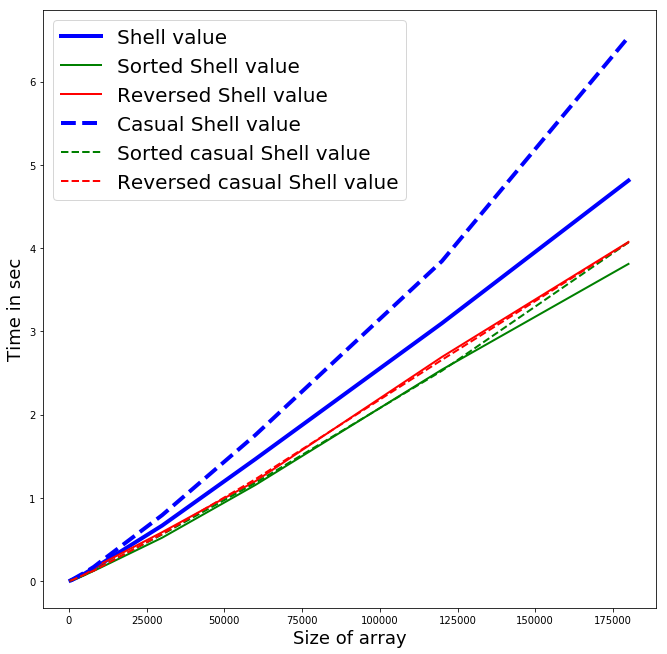

In [27]:
plt.figure(num=1, figsize=(11,11))
plt.xlabel('Size of array', fontsize=18)
plt.ylabel('Time in sec', fontsize=18)

""" ФАКТОРИАЛЬНОЕ РАЗБИЕНИЕ """

""" Обычный массив """
value_shell_line, = plt.plot(size_values, 
                             values_shell, 
                             'b-', 
                             linewidth=4.0, 
                             label='Shell value')

""" Отсортированный массив """
value_shell_sorted_line, = plt.plot(size_values, 
                                    values_shell_sorted, 
                                    'g-', 
                                    linewidth=2.0, 
                                    label='Sorted Shell value')

""" Инвертированный массив """
value_shell_reversed_line, = plt.plot(size_values, 
                                     values_shell_reversed, 
                                     'r-', 
                                     linewidth=2.0, 
                                     label='Reversed Shell value')


""" БИНОМИНАЛЬНОЕ РАЗБИЕНИЕ """

""" Обычный массив """
value_shell_casual_line, = plt.plot(size_values, 
                                    values_shell_casual, 
                                    'b--', 
                                    linewidth=4.0, 
                                    label='Casual Shell value')

""" Отсортированный массив """
value_shell_casual_sorted_line, = plt.plot(size_values, 
                                           values_shell_casual_sorted, 
                                           'g--', 
                                           linewidth=2.0, 
                                           label='Sorted casual Shell value')

""" Инвертированный массив """
value_shell_casual_reversed_line, = plt.plot(size_values, 
                                             values_shell_casual_reversed, 
                                             'r--', 
                                             linewidth=2.0, 
                                             label='Reversed casual Shell value')

plt.legend(handles=[value_shell_line, 
                    value_shell_sorted_line,
                    value_shell_reversed_line, 
                    value_shell_casual_line, 
                    value_shell_casual_sorted_line, 
                    value_shell_casual_reversed_line],
           loc=2, 
           fontsize=20)

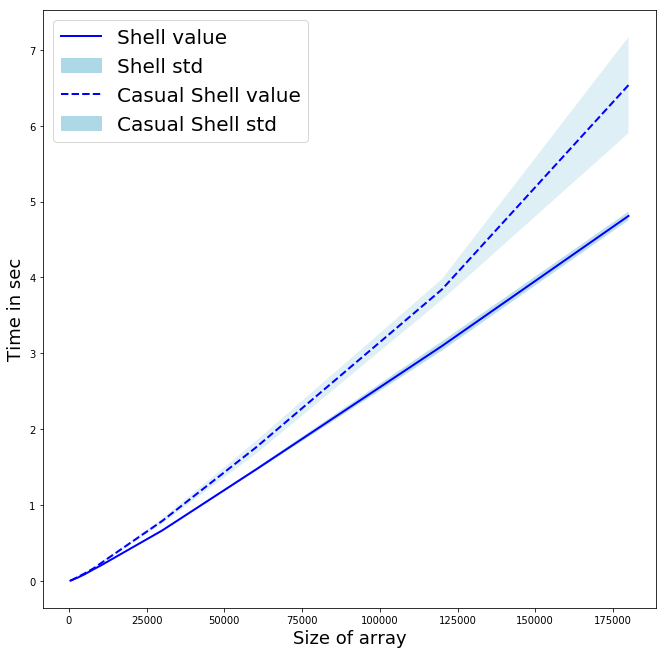

In [28]:
plt.figure(num=1, figsize=(11,11))
plt.xlabel('Size of array', fontsize=18)
plt.ylabel('Time in sec', fontsize=18)

""" ФАКТОРИАЛЬНОЕ РАЗБИЕНИЕ """

""" Обычный массив """
value_shell_line, = plt.plot(size_values, 
                             values_shell, 
                             'b-', 
                             linewidth=2.0, 
                             label='Shell value')
plt.fill_between(size_values, 
                 values_shell + deviation_shell, 
                 values_shell - deviation_shell, 
                 interpolate=True, 
                 facecolor='lightblue',
                 alpha=0.8)
std_shell_patch = mpatches.Patch(color='lightblue', label='Shell std')

""" БИНОМИНАЛЬНОЕ РАЗБИЕНИЕ """

""" Обычный массив """
value_shell_casual_line, = plt.plot(size_values, 
                                    values_shell_casual, 
                                    'b--', 
                                    linewidth=2.0, 
                                    label='Casual Shell value')
plt.fill_between(size_values, 
                 values_shell_casual + deviation_shell_casual, 
                 values_shell_casual - deviation_shell_casual, 
                 interpolate=True, 
                 facecolor='lightblue',
                 alpha=0.4)
std_shell_casual_patch = mpatches.Patch(color='lightblue', label='Casual Shell std')

plt.legend(handles=[value_shell_line, 
                    std_shell_patch,
                    value_shell_casual_line, 
                    std_shell_casual_patch],
           loc=2, 
           fontsize=20)

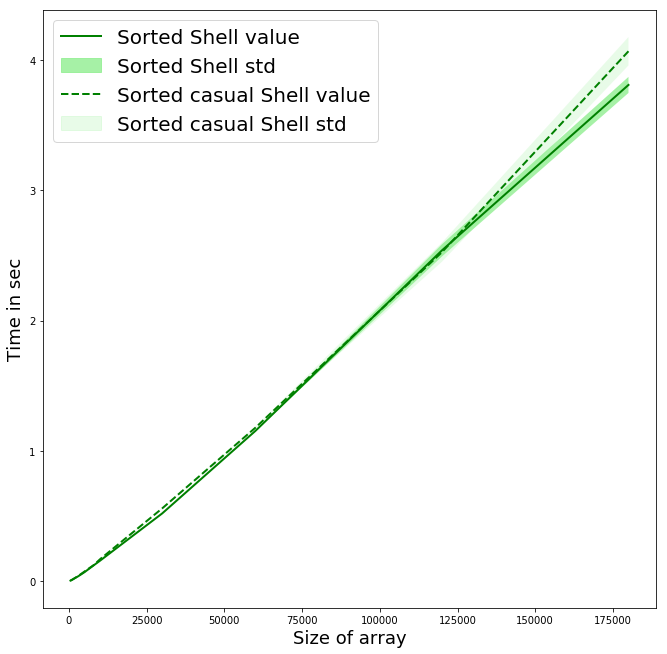

In [29]:
plt.figure(num=1, figsize=(11,11))
plt.xlabel('Size of array', fontsize=18)
plt.ylabel('Time in sec', fontsize=18)

""" ФАКТОРИАЛЬНОЕ РАЗБИЕНИЕ """

""" Отсортированный массив """
value_shell_sorted_line, plt.plot(size_values, values_shell_sorted, 'g-', linewidth=2.0)
plt.fill_between(size_values, 
                 values_shell_sorted + deviation_shell_sorted, 
                 values_shell_sorted - deviation_shell_sorted, 
                 interpolate=True, 
                 facecolor='lightgreen', 
                 alpha=0.8)
std_shell_sorted_patch = mpatches.Patch(color='lightgreen', label='Sorted Shell std', alpha=0.8)

""" БИНОМИНАЛЬНОЕ РАЗБИЕНИЕ """

""" Отсортированный массив """
value_shell_casual_sorted_line, = plt.plot(size_values, 
                                           values_shell_casual_sorted, 
                                           'g--', linewidth=2.0, 
                                           label='Sorted casual Shell value')
plt.fill_between(size_values, 
                 values_shell_casual_sorted + deviation_shell_casual_sorted, 
                 values_shell_casual_sorted - deviation_shell_casual_sorted, 
                 interpolate=True, 
                 facecolor='lightgreen', 
                 alpha=0.2)
std_shell_casual_sorted_patch = mpatches.Patch(color='lightgreen', label='Sorted casual Shell std', alpha=0.2)

plt.legend(handles=[value_shell_sorted_line,
                    std_shell_sorted_patch, 
                    value_shell_casual_sorted_line, 
                    std_shell_casual_sorted_patch],
           loc=2, 
           fontsize=20)

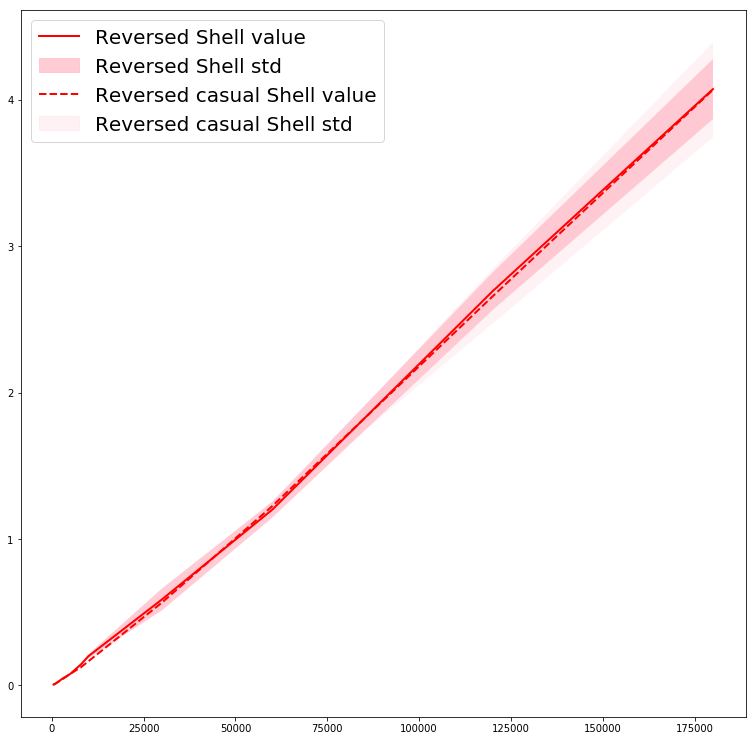

In [30]:
plt.figure(num=1, figsize=(13,13))

""" ФАКТОРИАЛЬНОЕ РАЗБИЕНИЕ """

""" Инвертированный массив """
value_shell_reversed_line, = plt.plot(size_values, 
                                     values_shell_reversed, 
                                     'r-', 
                                     linewidth=2.0, 
                                     label='Reversed Shell value')
plt.fill_between(size_values, 
                 values_shell_reversed + deviation_shell_reversed, 
                 values_shell_reversed - deviation_shell_reversed, 
                 interpolate=True, 
                 facecolor='pink', 
                 alpha=0.8)
std_shell_reversed_patch = mpatches.Patch(color='pink', label='Reversed Shell std', alpha=0.8)

""" БИНОМИНАЛЬНОЕ РАЗБИЕНИЕ """

""" Инвертированный массив """
value_shell_casual_reversed_line, = plt.plot(size_values, 
                                             values_shell_casual_reversed, 
                                             'r--', 
                                             linewidth=2.0, 
                                             label='Reversed casual Shell value')
plt.fill_between(size_values, 
                 values_shell_casual_reversed + deviation_shell_casual_reversed, 
                 values_shell_casual_reversed - deviation_shell_casual_reversed, 
                 interpolate=True, 
                 facecolor='pink', 
                 alpha=0.2)
std_shell_casual_reversed_patch = mpatches.Patch(color='pink', label='Reversed casual Shell std', alpha=0.2)

plt.legend(handles=[value_shell_reversed_line,
                    std_shell_reversed_patch, 
                    value_shell_casual_reversed_line, 
                    std_shell_casual_reversed_patch],
           loc=2, 
           fontsize=20)

## Выводы:
Исходя из графического представления результатов экспериментов, можно утверждать, что сортировка Шелла довольно устойчива к особым видам данных, к примеру, отсортированным. В частности, это наглядно видно исходя из того, что разброс времени сортировки уже отсортированного массива (светло-зеленый фон рядом с зеленой полосой) и разброс времени сортировки инвертированного массива (светло-розовый фон рядом с красной полосой) несущественно мал. Для сортировки Шелла довольно трудно подобрать такой случай, чтобы производительность падала хуже среднестатистического случая, как правило, эти случаи являются частными случаями для метода определения шага.

Экспериментально показано, что средняя производительность алгоритма с подбором шага по последовательности факториалов приблизительно равна $O(n^{\frac{3}{2}})$, что соответствует средней оценке сложности алгоритма Шелла с типичными шагами сортировки.